<a href="https://colab.research.google.com/github/DarshanGowda0/MusicalInstrumentsClassification/blob/main/PCA_mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA on all features

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 5.6MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


## Load data

In [ ]:
df = pd.read_hdf('/content/drive/MyDrive/mfcc-16-128-and-other-features.h5', key='s', mode='r')

In [ ]:
df.head(5)

,mfcc,chroma_stft,rms,spec_centroid,spec_bandwidth,rolloff,zero_crossing_rate,label
0,"[[-96.6713, 33.970665, -85.99933, 11.775715, -...",0.192537,0.165788,2710.505656,1800.720149,4480.336189,0.186073,pia
1,"[[-363.18875, 214.77817, 42.063976, -17.012432...",0.231391,0.055404,1059.742158,1206.201039,1882.977676,0.077194,sax
2,"[[-206.41943, 136.91168, -40.147747, -10.35337...",0.206500,0.098386,1395.872485,1261.009587,2471.439743,0.089523,cla
3,"[[-187.45334, 141.09206, -38.784027, 11.570753...",0.307935,0.047369,1449.074037,1752.177608,2736.399078,0.075764,vio
4,"[[-242.05544, 127.47795, 13.544904, 9.941675, ...",0.178166,0.068496,1171.824861,1513.914228,1689.683533,0.080482,flu


# shuffle

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
mfcc,other_features, y = df['mfcc'], df.values[:, 1:-1], df['label']
mfcc = np.stack([x for x in mfcc])
print(X.shape, other_features.shape)

(6705, 128, 16) (6705, 6)


## reshape mfcc

In [ ]:
mfcc_flat = X.reshape((mfcc.shape[0], np.product(mfcc.shape[1:])))
mfcc_flat.shape

(6705, 2048)

## stack all features

In [ ]:
X = np.hstack((mfcc_flat, other_features))
X.shape

(6705, 2054)

## Scale or normalize

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std.shape)

(6705, 2054)


## PCA on all features

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()


In [ ]:
pca.n_components = X_std.shape[1]
pca_data = pca.fit_transform(X_std)


In [ ]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

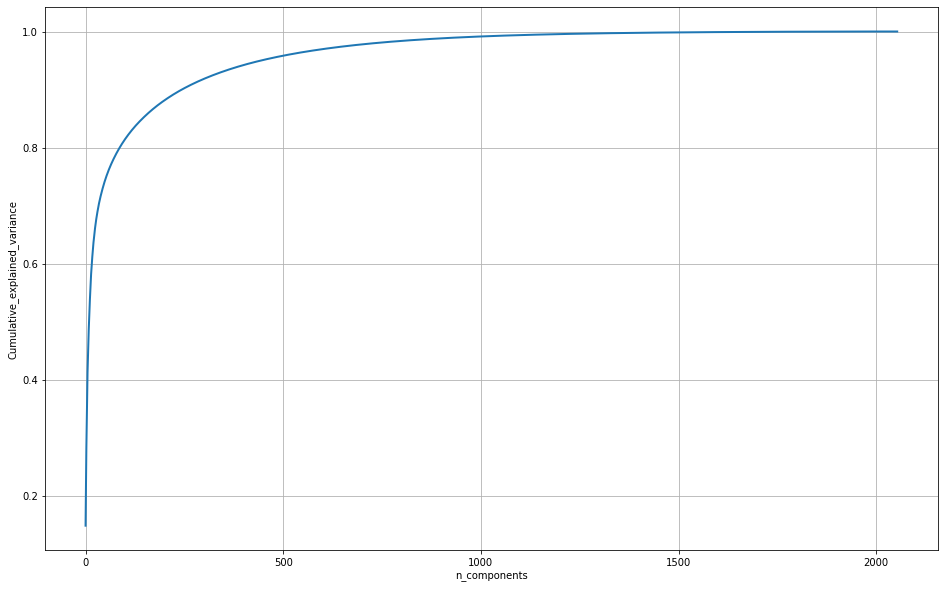

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

90% of the variance is explained in the first 250 prinicipal components of 2045, which should be enough and our data is reduced to about 10%

## PCA and transform features to top 250 principle components

In [ ]:
pca = decomposition.PCA()
pca.n_components = 250
pca_data = pca.fit_transform(X_std)

In [ ]:
pca_data.shape

(6705, 250)

In [ ]:
reduced_df = pd.DataFrame(zip(pca_data, y), columns=['pca_features', 'label'])
reduced_df.to_hdf('/content/drive/MyDrive/mfcc-and-other-pca-reduced.h5', key='s', mode='w')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['pca_features', 'label'], dtype='object')]

  encoding=encoding,
